# Plotting with matplotlib
Borrowed almost entirely from Scott Griffiths lecture at workshop "Python for Astronomers and Particle Physicists" (https://github.com/Python4AstronomersAndParticlePhysicists/PythonWorkshop-ICE/tree/master)

We will use matplotlib.pyplot for plotting: https://matplotlib.org for full documentation.

First we import the library.

In [1]:
import matplotlib.pyplot as plt

In [5]:
# Make the size and fonts larger 
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Matplotlib works best with numpy arrays, so we import `numpy` as well

In [3]:
import numpy as np

## Sidenote: numpy.random.rand
We will use the numpy random.rand function from numpy to make some datasets. This generates a sampling of random numbers between 0 and 1 according to a uniform distribution, with a specified shape.

<a id=line_plots></a>
# Simple Line Plots

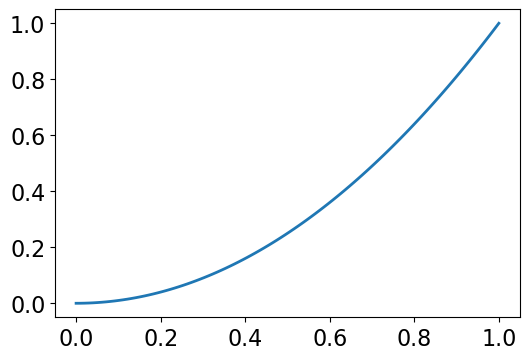

In [6]:
x = np.linspace(0, 1, 100) # 100 numbers from 0 to 1

plt.plot(x, x**2)
# If not interactive, e.g. in a script: 
# plt.show()

<a id=different_styles></a>
## Using different styles for plots

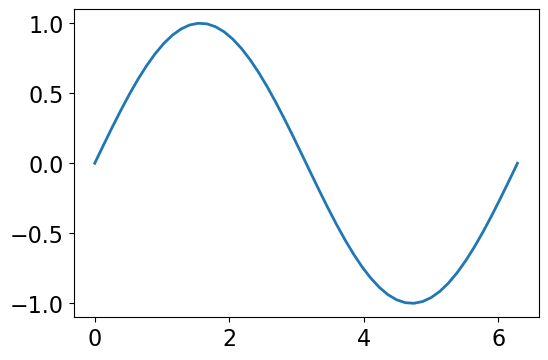

In [7]:
t = np.linspace(0, 2 * np.pi, 50)   # 50 points between 0 and 2π
plt.plot(t, np.sin(t));

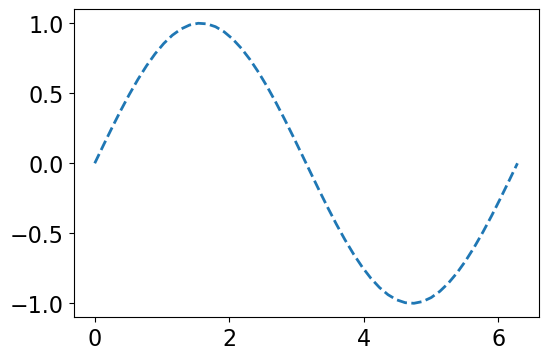

In [8]:
plt.plot(t, np.sin(t), '--');

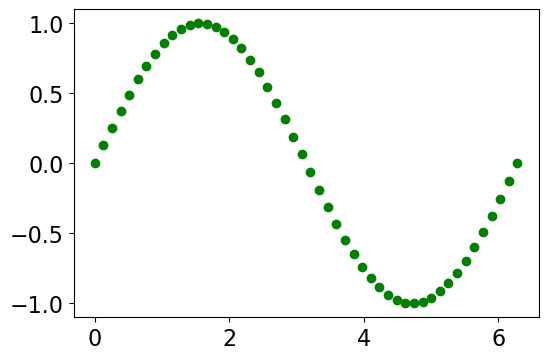

In [9]:
plt.plot(t, np.sin(t), 'go')
# plt.plot(t, np.sin(t), color='green', marker='o', linestyle='');   # same thing!

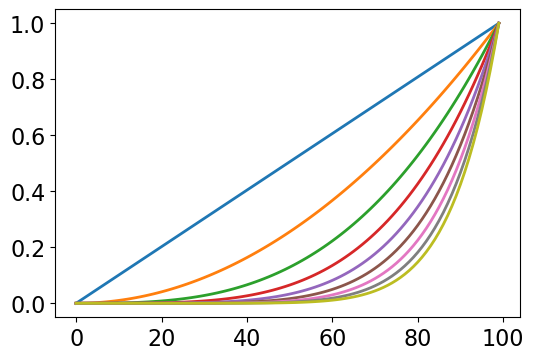

In [10]:
# all colors of the color rotation available as C<N>
x = np.linspace(0, 1, 100)
for n in range(9):
    plt.plot(x**(n + 1), color='C{}'.format(n))

All styles and colors: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)



<a id=setting_limits></a>
### Setting x and y limits

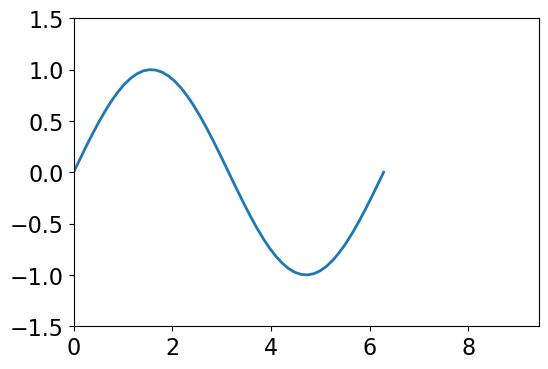

In [12]:
plt.plot(t, np.sin(t))
plt.xlim(0, 3*np.pi)
plt.ylim(-1.5, 1.5);

<a id=label_formatting></a>
### Label formatting

These options can be set globally in a matplotlibrc file,
see https://matplotlib.org/stable/users/explain/customizing.html

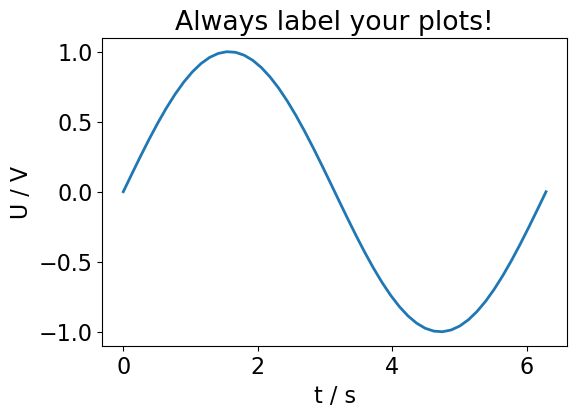

In [13]:
plt.plot(t, np.sin(t))

title_font = {'fontsize': 24, 'fontweight': 'bold', 'family': 'serif'}
axes_font = {'fontsize': 18, 'fontstyle': 'italic'}

#default
plt.xlabel('t / s')
plt.ylabel('U / V')
plt.title('Always label your plots!');
#customized
#plt.xlabel('t / s', axes_font)
#plt.ylabel('U / V', axes_font)
#plt.title('Always label your plots!', title_font);

<a id=latex_labels></a>
### Matplotlib can handle a rather complete subset of LaTeX in any text

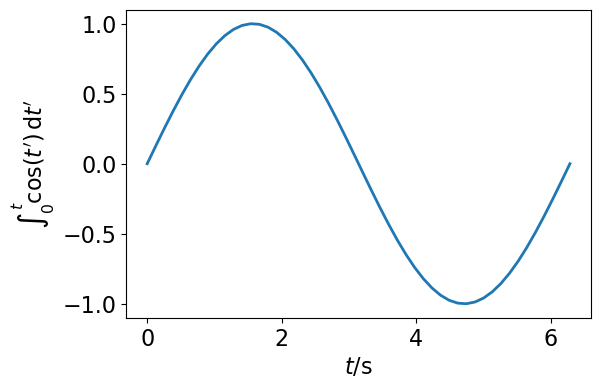

In [15]:
plt.plot(t, np.sin(t))
plt.xlabel(r'$t / \mathrm{s}$')   # leading r means "raw", so that '\' is handled correctly
plt.ylabel(r"$\int_0^t \cos(t') \, \mathrm{d}t'$");

<a id=legends></a>
## Legends

Matplotlib can create legends automatically for plot objects that have a label.

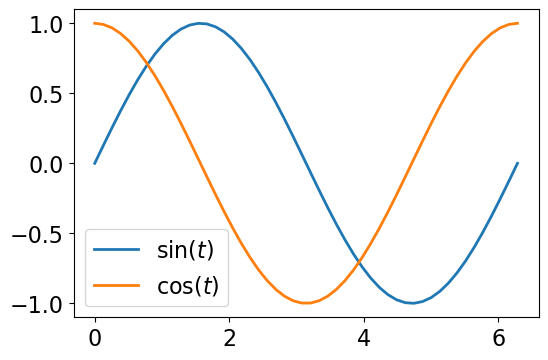

In [21]:
plt.plot(t, np.sin(t), label=r'$\sin(t)$')
plt.plot(t, np.cos(t), label=r'$\cos(t)$')
plt.legend()
#plt.legend(loc='upper center')

<a id=grids></a>
## Grids

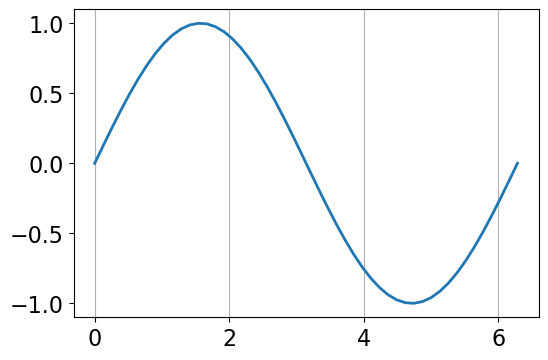

In [23]:
plt.plot(t, np.sin(t))
plt.grid()
#default is lines for both axes, can specify x or y
plt.grid(axis='y')

<a id=axis_scales></a>
## Axis-Scales

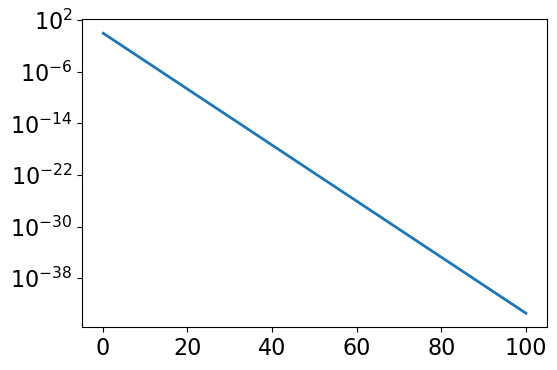

In [28]:
#x = np.linspace(0, 10)
x = np.logspace(-1, 2, 100)

plt.plot(x, np.exp(-x))
plt.yscale('log')
#plt.xscale('log')

<a id=ticks></a>
## Ticks

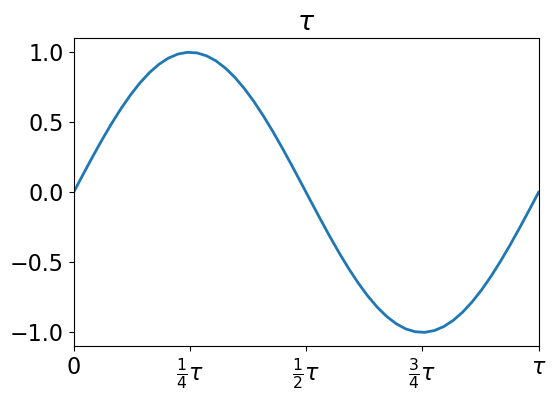

In [33]:
x = np.linspace(0, 2*np.pi)

plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)
# First argument: position, second argument: labels
plt.xticks(
    np.arange(0, 2*np.pi + 0.1, np.pi/2),
    [r"$0$", r"$\frac{1}{4}\tau$", r"$\frac{1}{2}\tau$", r"$\frac{3}{4}\tau$", r"$\tau$"]
)
#plt.xticks(
#    np.arange(0, 2*np.pi, np.pi/2),
#    [r"$0$", r"$\frac{1}{4}\tau$", r"$\frac{1}{2}\tau$", r"$\frac{3}{4}\tau$"]
#)
plt.title(r"$\tau$")   
None

# Bar graphs

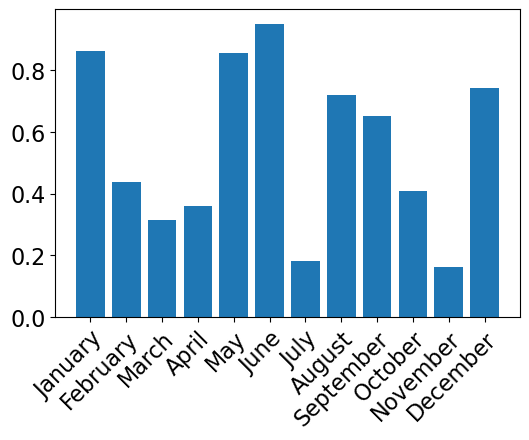

In [36]:
months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.bar(np.arange(12), np.random.rand(12))
plt.xticks(
    np.arange(12),
    months,
    rotation=45,
    rotation_mode='anchor',
    horizontalalignment='right',  # or ha
    verticalalignment='top',      # or va
);

<a id=multiple_lines></a>
## Multiple lines in the same plot

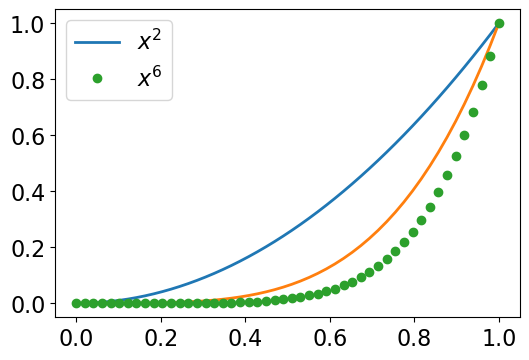

In [39]:
x = np.linspace(0, 1)

plt.plot(x, x**2, label=r'$x^2$')
plt.plot(x, x**4)
plt.plot(x, x**6, 'o', label=r'$x^6$')

plt.legend(loc='best');

**Remember**: Legend entries are only generated for plot objects that have a label (note x⁴ is missing)!

<a id=multiple_plots></a>
## Multiple plots in the same figure

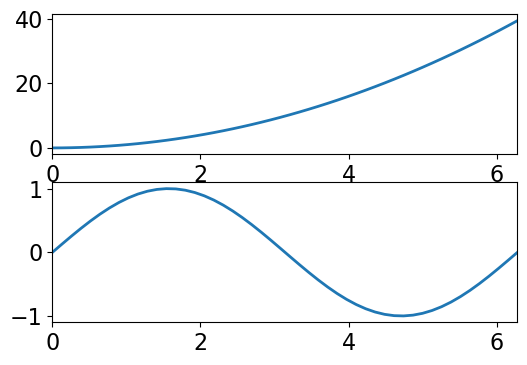

In [45]:
x = np.linspace(0, 2*np.pi)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2*np.pi)

a = plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi);

<a id=shared_axes></a>
### Shared Axes

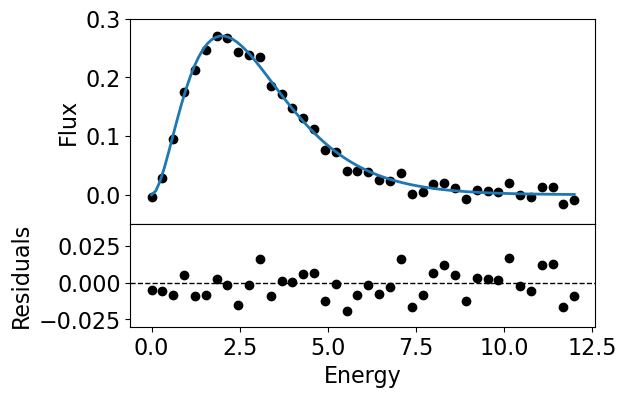

In [55]:
import math

def poisson(x, k):
    return np.exp(-x)*x**k / math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')
#ax1.set_yticks(ax1.get_yticks()[1:])    # remove bottom y-tick

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')
#ax2.set_yticks(ax2.get_yticks()[:-2])   # remove top y-tick

fig.subplots_adjust(hspace=0)
#fig.suptitle('\nFake Spectrum', fontweight='bold');

<a id=tight_layout></a>
### You should almost always call `plt.tight_layout()`

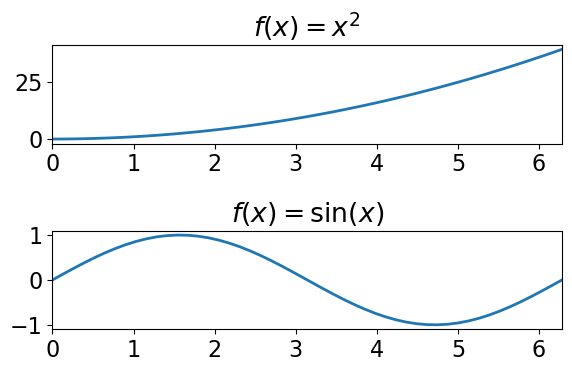

In [58]:
x = np.linspace(0, 2*np.pi)

plt.subplot(2, 1, 1)
plt.plot(x, x**2)
plt.xlim(0, 2*np.pi)
plt.title(r"$f(x)=x^2$")

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))
plt.xlim(0, 2*np.pi)
plt.title(r"$f(x)=\sin(x)$")

plt.tight_layout()   # try commenting this line out!

<a id=inset_plots></a>
### Inset Plots (plot inside a plot)

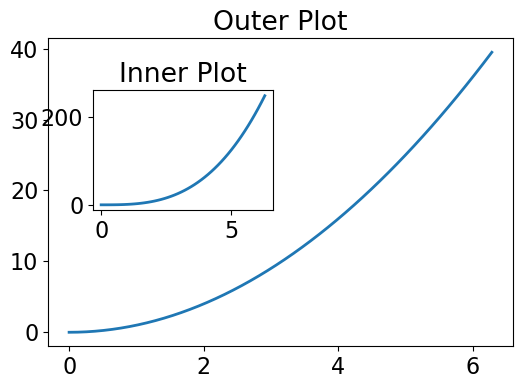

In [59]:
plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

<a id=error_bars></a>
# Error bars

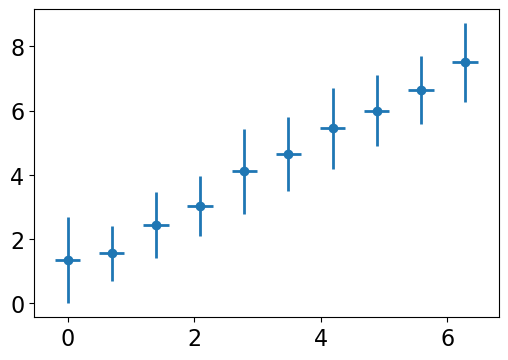

In [60]:
x = np.linspace(0, 2*np.pi, 10)
errY = np.random.normal(1, 0.2, 10)
plt.errorbar(x, x + errY, xerr=0.2, yerr=errY, fmt='o');

<a id=asym_errors></a>
## Asymmetrical errors

Give 2 arrays to the `xerr` or `yerr` kwargs:


<ErrorbarContainer object of 3 artists>

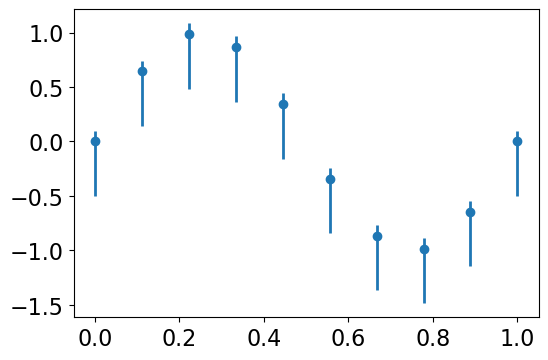

In [61]:
x = np.linspace(0, 1, 10)
plt.errorbar(
    x, 
    np.sin(2 * np.pi * x),
    yerr=[np.full_like(x, 0.5), np.full_like(x, 0.1)], #full_like: fill array with the same shape as given array
    linestyle='',
    marker='o',
)

<a id=upper_limits></a>
## Upper and lower limits


Often, we want to give uncertainties for some values, but upper or lower limits for others.

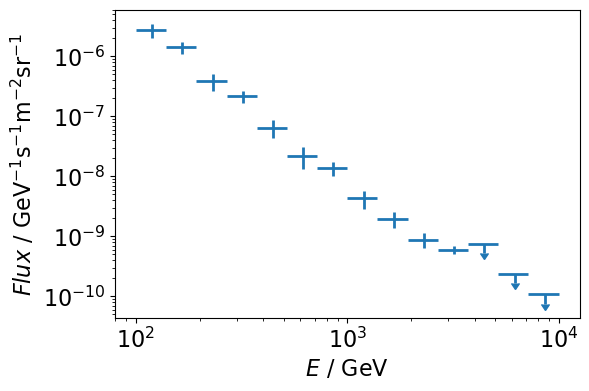

In [62]:
bins = np.logspace(2, 4, 15)
x = (bins[:-1] + bins[1:]) / 2

y = x**(-2.7)
yerr = y * 0.3
y += np.random.normal(0, yerr)

# mask for which points are upper limits
uplims = np.full_like(x, False)

# last points are only upper limits
y[-3:] += 3 * y[-3:]
yerr[-3:] = 0.3 * y[-3:] # yerr determines length of limit arrow
uplims[-3:] = True 

plt.errorbar(
    x,
    y,
    xerr=np.diff(bins/2),
    yerr=yerr,
    uplims=uplims,
    ls='none',
)

plt.xlabel(r'$E \ / \ \mathrm{GeV}$')
plt.ylabel(r'$Flux \ / \ \mathrm{GeV}^{-1} \mathrm{s}^{-1} \mathrm{m}^{-2} \mathrm{sr}^{-1}$')
plt.xscale('log')
plt.yscale('log')

<a id=polar_plots></a>
# Polar Plots

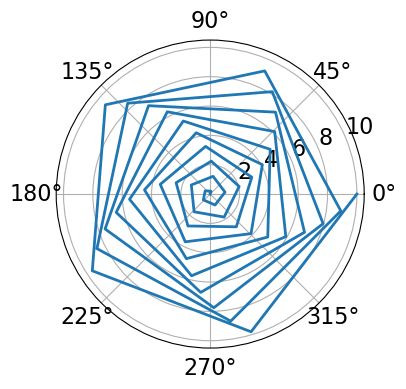

In [63]:
r = np.linspace(0, 10, 50)
# r = np.linspace(0, 10, 1000)
theta = 2*np.pi*r

plt.polar(theta, r);

<a id=histograms></a>
# Histograms

<a id=hist1d></a>
## 1D Histograms

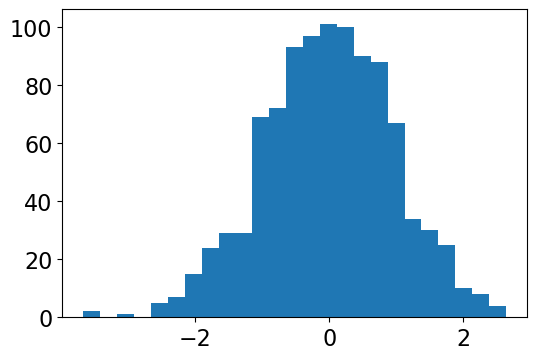

In [68]:
# Generate random data:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=25);

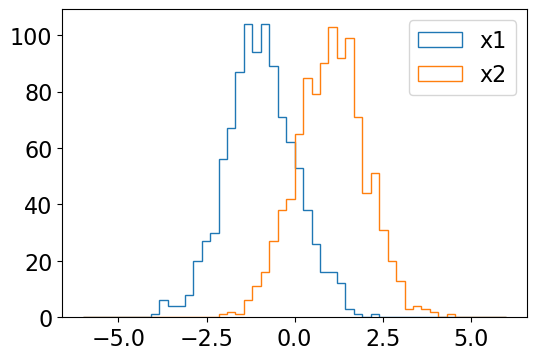

In [69]:
x1 = np.random.normal(-1, 1, 1000)
x2 = np.random.normal(1, 1, 1000)

bin_edges = np.linspace(-6, 6, 51)  # 50 bins between -6 and 6

plt.hist(x1, bins=bin_edges, histtype='step', label='x1')
plt.hist(x2, bins=bin_edges, histtype='step', label='x2')

plt.legend();

<a id=hist2d></a>
## 2D Histograms

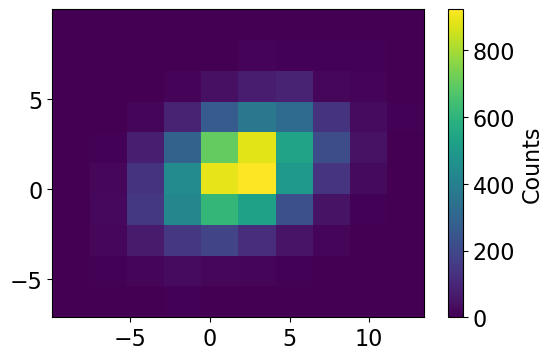

In [70]:
mean = [2, 1]
cov = [[9, 2],
       [2, 4]]

x, y = np.random.multivariate_normal(mean, cov, size=10000).T

plt.hist2d(x, y)
# plt.hist2d(x, y, bins=50)
# plt.hist2d(x, y, bins=[25, 50], range=[[-10, 14], [-5, 7]])

plt.colorbar(label='Counts');

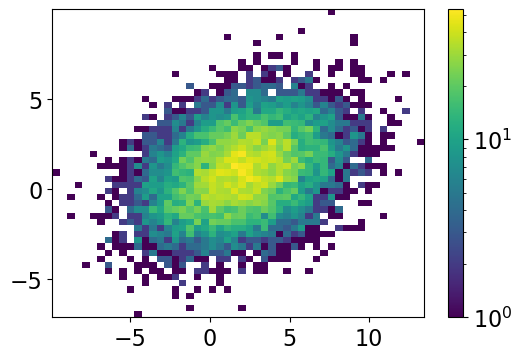

In [71]:
from matplotlib.colors import LogNorm

plt.hist2d(x, y, bins=50, norm=LogNorm())

plt.colorbar();

<a id="scatter"></a>
# Scatter Plots

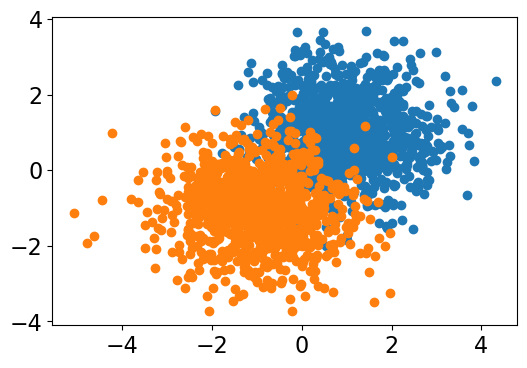

In [72]:
x1, y1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 1000).T
x2, y2 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], 1000).T

plt.scatter(x1, y1)
plt.scatter(x2, y2);

In [ ]:
x = np.append(x1, x2) #now 2000 points
y = np.append(y1, y2)
s = np.random.uniform(5, 50, 2000)
label = np.append(np.ones_like(x1), np.zeros_like(x2))

plt.scatter(x, y, c=label, s=s);

<a id=oo_syntax></a>
# Using the object orientated syntax

Matplotlib has two APIs (yes, it's strange).

* The matlab-like syntax we used until now:
    * Easier to write
    * Familiar for matlab users
    * Frequently uses global states
* Object-oriented syntax:
    * More powerful
    * More control over the plots
    * Preferable for library code
    * No (or at least very few) global states

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 2*np.pi, 1000)

fig, (ax1, ax2) = plt.subplots(2, 1)

# note that plot is now a method of ax1, not the global plt object
ax1.plot(t, np.sin(t), 'r-')
ax1.set_title(r"$f(t)=\sin(t)$")   # use object-oriented get/set syntax
ax1.set_xlabel("$t$")
ax1.set_xlim(0, 2*np.pi)
ax1.set_ylim(-1.1, 1.1)

ax2.plot(t, np.cos(t), 'b-')
ax2.set_title(r"$f(t)=\cos(t)$")
ax2.set_xlabel("$t$")
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.1, 1.1)

fig.tight_layout()

<a id=publication_plots></a>
## More on plots with LaTeX

* Use fully blown LaTeX installation using the `pgf` backend
* Match the font and font sizes as in your LaTeX document
* Really high quality plots



<a id=plot_styles></a>
## Plot styles

List available styles:

In [ ]:
print(plt.style.available)

In [ ]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.random.normal(1, 0.2, 10)
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

<a id=save_figures></a>
## Saving figures

Use `plt.savefig` to save your figure.

You can either give path relative to your working directory or an absolute path.
Not sure what the current working directory is?

In [ ]:
pwd()

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")

# save in current directory; extension determines file type
plt.savefig('awesome_plot.pdf')
plt.savefig('awesome_plot.eps')
plt.savefig('awesome_plot.png', dpi=300) 
plt.savefig('awesome_plot.jpg', dpi=300)   